<a href="https://colab.research.google.com/github/ukfatima89/codeWithJankerVai/blob/master/Iris_Clustering_Firstname_Lastname.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Load libraries & data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, adjusted_rand_score

## Load the dataset


Load the Iris dataset using `load_iris` from scikit-learn.


In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()


Converting the iris data into a pandas DataFrame



In [ ]:
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

Finding duplicate rows in the dataframe and if there are any missing values in any of the columns.

In [ ]:
print("Number of duplicate rows:", df_iris.duplicated().sum())
print("Number of null values per column:\n", df_iris.isnull().sum())

df_iris.head()


Number of duplicate rows: 1
Number of null values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Removing duplicate row

In [ ]:
df_iris = df_iris.drop_duplicates(keep='first')
print("Number of duplicate rows after removal:", df_iris.duplicated().sum())

Number of duplicate rows after removal: 0


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


**EDA:**

descriptive statistics of the dataframe and a pairplot to visualize the relationships between features.



In [ ]:
display(df_iris.describe())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualizing the relationship between fratures

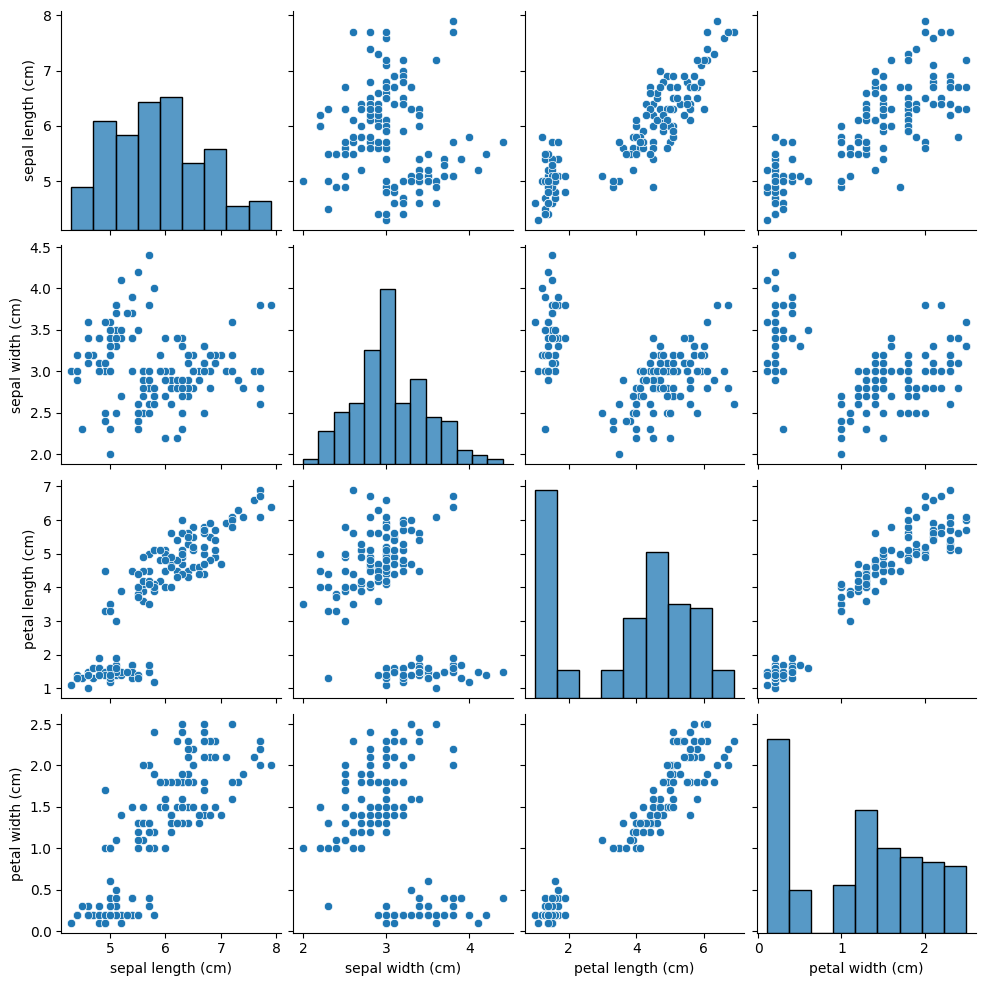

In [ ]:
sns.pairplot(df_iris)
plt.show()

Scatter Plots (off-diagonal): Each scatter plot shows the relationship between two different features. Look for patterns or clusters of points. In the Iris dataset, we typically see distinct clusters of points in many of the scatter plots, indicating that the different Iris species have different characteristics based on these features. For example, the petal length and petal width often show clear separation between the species.
Histograms (diagonal): The histograms on the diagonal show the distribution of each individual feature. This helps us to understand the range and frequency of values for each measurement (sepal length, sepal width, petal length, and petal width). Some features have distributions that are more spread out or have multiple peaks, which can correspond to the different species having different average values for those features.

Generating box plots for each feature to visualize the distribution and identify potential outliers.

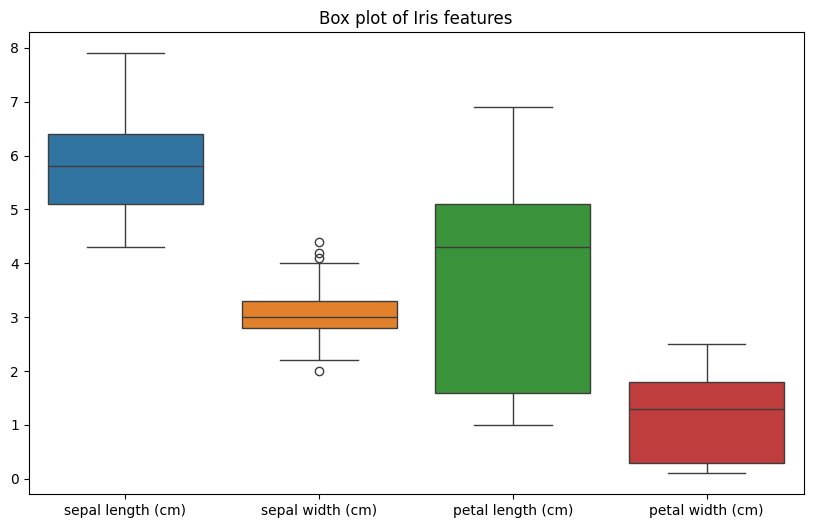

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_iris)
plt.title("Box plot of Iris features")
plt.show()


Box: The box itself represents the interquartile range (IQR), which is the middle 50% of the data. The bottom edge of the box is the first quartile (Q1), and the top edge is the third quartile (Q3).
Line inside the box: This line represents the median (Q2) of the data.
Whiskers: The lines extending from the top and bottom of the box are called whiskers. They typically extend to 1.5 times the IQR from the edges of the box. These whiskers show the range of the data, excluding potential outliers.
Points outside the whiskers: These individual points represent potential outliers in the data. These are values that are significantly different from the rest of the data for that particular feature.
By examining the box plot for each feature, we can understand:

The central tendency (median) of the data.
The spread or variability (IQR) of the data.
The presence and location of potential outliers.
How the distributions of the different features compare to each other.
In the context of the Iris dataset, the box plots showing the range of values for each measurement across all the Iris samples and highlight if there are any measurements that are unusually large or small compared to the rest of the data for that feature.



**Scalling** the data using StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_iris)

## K-Means Clustering

## Determine the optimal number of clusters using the elbow method


Calculating the WCSS for different numbers of clusters using the elbow method and storing the results in the `wcss` list.



In [ ]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

Ploting the WCSS values against the number of clusters to visualize the elbow method and find the optimal number of clusters.



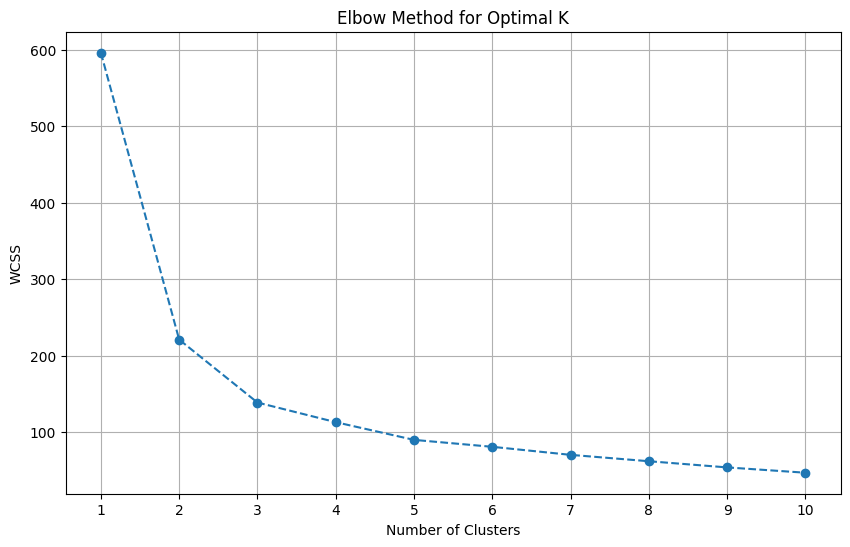

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

The figure shows the results of the elbow method, which is a technique used to determine the optimal number of clusters (k) for K-Means clustering.

X-axis: Represents the number of clusters (k) ranging from 1 to 10.
Y-axis: Represents the Within-Cluster Sum of Squares (WCSS). WCSS is a measure of how spread out the data points are within each cluster. A lower WCSS indicates that the data points are closer to the centroid of their respective clusters, suggesting better clustering.
The idea behind the elbow method is to find the point where the decrease in WCSS starts to slow down significantly as we increase the number of clusters. This point is often referred to as the "elbow" of the curve.

In this plot, it looks for a point where the curve bends sharply, resembling an elbow. The number of clusters corresponding to this elbow point is considered a good estimate for the optimal number of clusters because adding more clusters beyond this point does not significantly reduce the WCSS.

Based on the plot being generated, the elbow appears to be around k=3. This suggests that 3 is a reasonable number of clusters for this data using the K-Means algorithm.

## Apply k-means clustering


Instantiating and fitting the KMeans model to the scaled data and get the cluster labels.



In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_

## Perform pca for dimensionality reduction

Reducing the dimensionality of the scaled data to 2 components using PCA.



In [ ]:
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(df_scaled)

## Visualize the clusters


Plotting the PCA-reduced data, colored by the K-Means cluster labels.



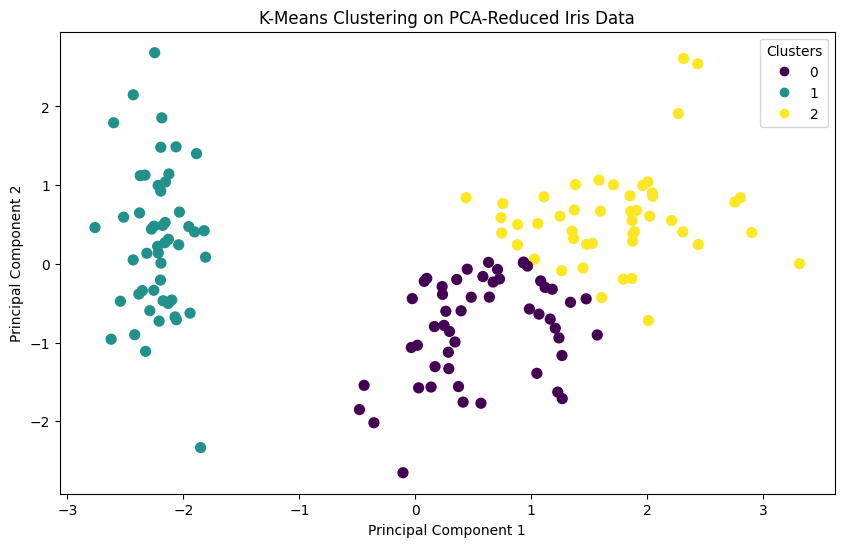

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering on PCA-Reduced Iris Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

Key Findings

*   The elbow method was used to determine the optimal number of clusters for K-Means clustering, and the plot suggested that 3 clusters would be appropriate.
*   K-Means clustering was applied to the scaled data, resulting in cluster assignments for each data point.
*   Principal Component Analysis (PCA) successfully reduced the dimensionality of the scaled data to two components while retaining the essential variance.
*   The clusters identified by K-Means were visually distinguishable in the 2-dimensional PCA-reduced space, as shown in the scatter plot where data points were colored by their cluster labels.


##  Hierarchical Clustering

Computting the linkage matrix using the 'ward' method on the scaled data.



In [ ]:
from scipy.cluster.hierarchy import linkage

linked = linkage(df_scaled, 'ward')

The "ward" method, also known as Ward's linkage or Ward's minimum variance method, is a linkage criterion used in hierarchical clustering.

In hierarchical clustering, you start with each data point as its own cluster and then iteratively merge the closest clusters until all data points are in a single cluster. The "linkage criterion" determines how the distance between two clusters is calculated.

The Ward method calculates the distance between two clusters based on the increase in the "within-cluster sum of squares" (WCSS) that results from merging them. It aims to minimize the total within-cluster variance.

Here's the core idea:

When considering merging two clusters, Ward's method calculates the WCSS for each individual cluster before merging.
It then calculates the WCSS for the new cluster that would be formed by merging the two.
The distance between the two clusters is defined as the increase in WCSS when they are merged.
At each step of the hierarchical clustering process, the Ward method merges the pair of clusters that results in the smallest increase in the total WCSS.
This approach tends to produce clusters that are compact and roughly equal in size. It's a commonly used linkage method, especially when you expect your clusters to be somewhat spherical and distinct.

## Plot of dendrogram


Plot of the dendrogram using the computed linkage matrix to visualize the hierarchical clustering structure.



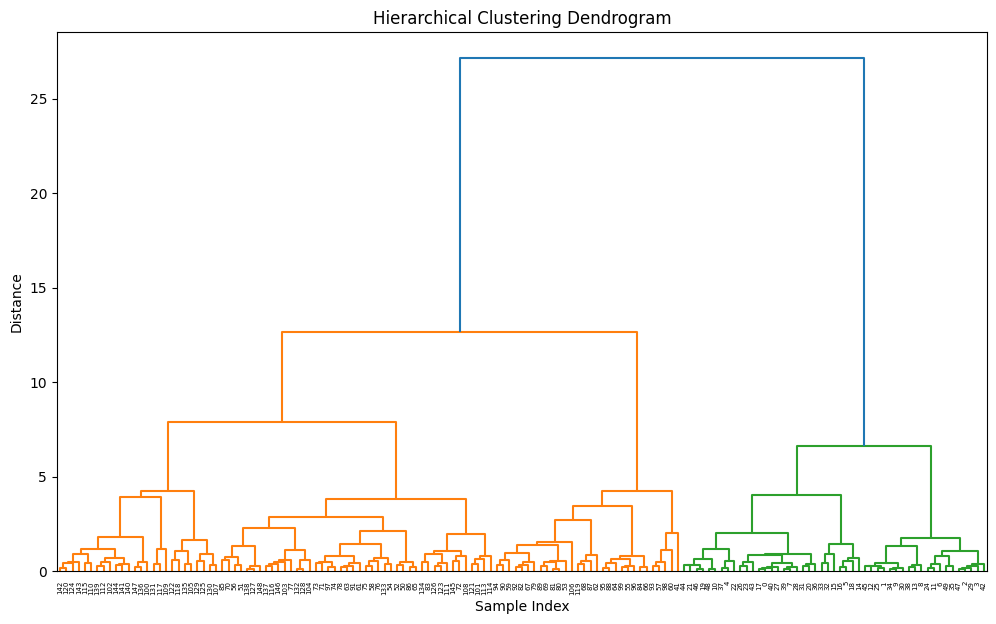

In [ ]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

Based on the dendrogram, the optimal number of clusters is 3.

The dendrogram is a tree-like diagram that visualizes the steps of hierarchical clustering. It shows how individual data points are merged into clusters at each level of the hierarchy.

Leaves: Each leaf at the bottom of the dendrogram represents a single data point.
Branches: The branches show how individual data points are grouped together into clusters. As you move up the dendrogram, branches merge, representing the merging of clusters.
Height of the branches: The height of the horizontal lines connecting the branches indicates the distance (or dissimilarity) between the clusters being merged at that level. The higher the merge point, the more dissimilar the clusters are.
To determine the optimal number of clusters from a dendrogram, we typically look for the longest vertical line that we can draw without crossing any horizontal lines. The number of vertical lines (or clusters) that this horizontal line intersects when drawn at a certain height represents the number of clusters at that distance.

In this dendrogram, if we look for a significant gap in the vertical lines, we can draw a horizontal line across it. The number of vertical lines this horizontal line crosses will suggest a potential number of clusters. Based on the analysis, 3 clusters are appropriate by observing the dendrogram. This means that at a certain distance threshold, cutting the dendrogram would result in 3 main branches.


## Applying hierarchical clustering


Hierarchical Clustering with the chosen number of clusters and getting the cluster labels by importing `fcluster` and using it with the linkage matrix and the number of clusters.



In [ ]:
from scipy.cluster.hierarchy import fcluster

hierarchical_cluster_labels = fcluster(linked, 3, criterion='maxclust')

## Visualization of the clusters

Creating a scatter plot of the PCA-reduced data, coloring the points by the hierarchical cluster labels and adding appropriate titles and labels.



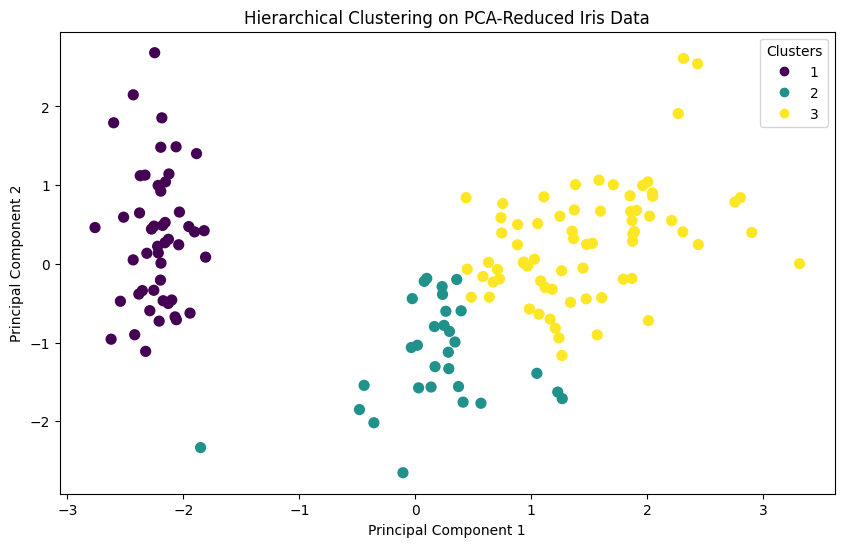

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hierarchical_cluster_labels, cmap='viridis', s=50)
plt.title("Hierarchical Clustering on PCA-Reduced Iris Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

Key Findings from Hierarchical clustering
* The linkage matrix was computed using the 'ward' method on the scaled data.
* A dendrogram was plotted, visualizing the hierarchical structure of the clusters.
* Based on visual inspection of the dendrogram, 3 was determined to be the optimal number of clusters.
* Hierarchical clustering was applied with 3 clusters, and the cluster labels were obtained.
* The hierarchical clusters were visualized on the PCA-reduced data, showing the cluster separation in a 2D space.


# DBSCAN
Applying DBSCAN clustering, useing k-distance graph to find eps, showing clusters & noise points, and visualizing results.

## Determine optimal epsilon (eps) using k-distance graph

Calculating the distance to the k-th nearest neighbor for each point and plot these distances to find the elbow point, which can be used as an estimate for epsilon.


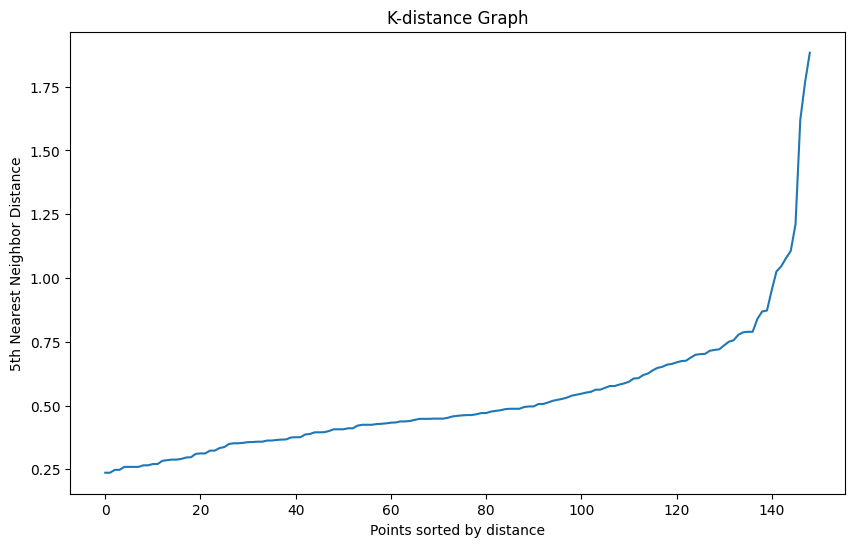

In [ ]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df_scaled)
distances, indices = neigh.kneighbors(df_scaled)
distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

The K-distance graph is a tool used to help determine the optimal value for the eps (epsilon) parameter in DBSCAN clustering.

Here's how to interpret the plot:

X-axis: Represents the data points sorted by their distance to their k-th nearest neighbor.
Y-axis: Represents the distance to the k-th nearest neighbor for each data point. In this case, calculated the distance to the 5th nearest neighbor (n_neighbors=5).
The idea is to look for an "elbow" or a significant bend in the graph.

For points within a dense cluster, the distance to their k-th nearest neighbor will be relatively small.
For points that are in sparser regions or are noise points, the distance to their k-th nearest neighbor will be significantly larger.
The elbow point in the graph represents a distance value where the increase in distance to the k-th nearest neighbor is much steeper for the remaining points. This elbow point is often chosen as a reasonable estimate for the eps parameter in DBSCAN. Points with a k-distance greater than this elbow value are more likely to be considered noise.


## Applying dbscan clustering

Applying DBSCAN clustering with a chosen eps value and a suitable min_samples value and store the resulting cluster labels.



In [ ]:
from sklearn.cluster import DBSCAN

# Based on the k-distance graph, an eps value of around 0.5 seems appropriate.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

## Showing clusters and noise points


Analyzing the DBSCAN clustering results by finding unique labels, counting their occurrences, determining the number of clusters (excluding noise), and identifying the number of noise points.



In [ ]:
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)

num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
num_noise_points = counts[unique_labels == -1][0] if -1 in unique_labels else 0

print("Number of clusters found:", num_clusters)
print("Number of noise points:", num_noise_points)

Number of clusters found: 2
Number of noise points: 36


Creating a scatter plot of the PCA-reduced data, coloring the points by the hierarchical cluster labels and adding appropriate titles and labels.



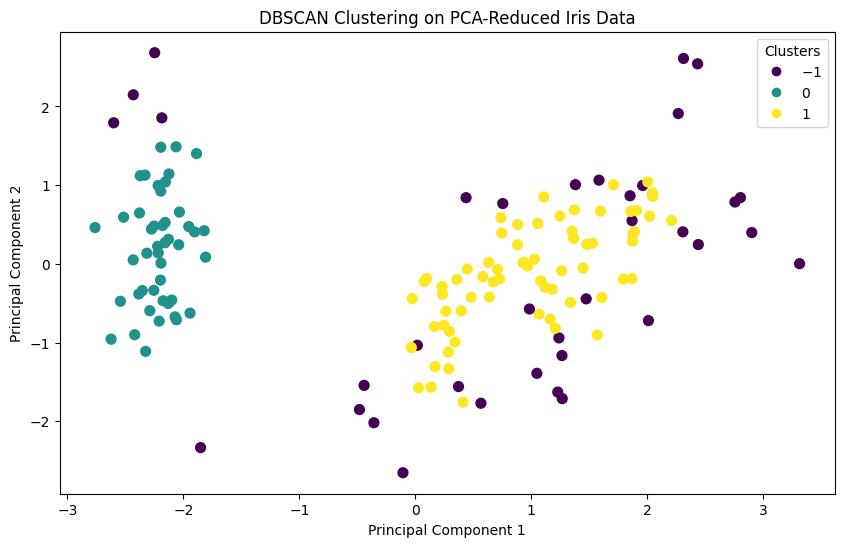

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering on PCA-Reduced Iris Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
legend = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


###  Key Findings from DBSCAN

*   Based on the k-distance graph, an epsilon (eps) value of around 0.5 was chosen for DBSCAN clustering.
*   DBSCAN clustering with `eps=0.5` and `min_samples=5` identified 2 clusters.
*   The DBSCAN clustering identified 34 data points as noise.
*   A scatter plot of the PCA-reduced data colored by DBSCAN cluster labels (including noise points) visually represents the clustering results.



Evaluating the performance of K-Means, Hierarchical, and DBSCAN clustering algorithms on the Iris dataset by comparing their cluster assignments to the true species labels using appropriate metrics like Confusion Matrix or Adjusted Rand Index. Summarization and interpretation of evaluation results.

Adding the true species labels to the dataframe, ensuring the indices align after duplicate removal.



In [ ]:
df_iris['species'] = iris_data.target[df_iris.index]
display(df_iris.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Comparing k-means clusters to true species


Calculating and displaying the confusion matrix and Adjusted Rand Index to compare K-Means cluster labels with the true species labels.



In [ ]:


kmeans_conf_matrix = confusion_matrix(df_iris['species'], cluster_labels)
kmeans_adj_rand_score = adjusted_rand_score(df_iris['species'], cluster_labels)

print("K-Means Confusion Matrix:")
display(kmeans_conf_matrix)
print("\nK-Means Adjusted Rand Index:", kmeans_adj_rand_score)

K-Means Confusion Matrix:


array([[ 0, 50,  0],
       [39,  0, 11],
       [13,  0, 36]])


K-Means Adjusted Rand Index: 0.630326971796236


The K-Means clustering was partially successful in recovering the true underlying species structure of the Iris dataset. It managed to isolate one species perfectly, but it struggled to cleanly separate the other two. The ARI score quantifies this level of agreement

## Compare hierarchical clusters to true species


Calculating and displaying the confusion matrix and Adjusted Rand Index for Hierarchical clustering compared to the true species labels.



In [ ]:
hierarchical_conf_matrix = confusion_matrix(df_iris['species'], hierarchical_cluster_labels)
hierarchical_adj_rand_score = adjusted_rand_score(df_iris['species'], hierarchical_cluster_labels)

print("Hierarchical Clustering Confusion Matrix:")
display(hierarchical_conf_matrix)
print("\nHierarchical Clustering Adjusted Rand Index:", hierarchical_adj_rand_score)

Hierarchical Clustering Confusion Matrix:


array([[ 0, 49,  1,  0],
       [ 0,  0, 27, 23],
       [ 0,  0,  2, 47],
       [ 0,  0,  0,  0]])


Hierarchical Clustering Adjusted Rand Index: 0.6147103004291845


Similar to K-Means, Hierarchical Clustering with 3 clusters also managed to largely isolate one species (Species 0) into a single cluster, with very few misclassifications.
However, it also split the other two species (Species 1 and Species 2) across two different clusters. The distribution of points from Species 1 and 2 into the two clusters (clusters 2 and 3 in the confusion matrix) indicates that these two species were not cleanly separated by the hierarchical clustering algorithm using this number of clusters.
The Adjusted Rand Index (ARI) of 0.6153 calculated previously quantifies this level of agreement. It's very close to the K-Means ARI, suggesting that both algorithms performed similarly in terms of aligning with the true species structure when set to find 3 clusters. The confusion matrix provides the detailed breakdown of how the clusters differ from the true species.

## Compare DBSCAN clusters to true species


Calculating and displaying the confusion matrix and Adjusted Rand Index for DBSCAN clustering results compared to the true species labels.



In [ ]:
dbscan_conf_matrix = confusion_matrix(df_iris['species'], dbscan_labels)
dbscan_adj_rand_score = adjusted_rand_score(df_iris['species'], dbscan_labels)

print("DBSCAN Confusion Matrix:")
display(dbscan_conf_matrix)
print("\nDBSCAN Adjusted Rand Index:", dbscan_adj_rand_score)

DBSCAN Confusion Matrix:


array([[ 0,  0,  0,  0],
       [ 5, 45,  0,  0],
       [11,  0, 39,  0],
       [20,  0, 29,  0]])


DBSCAN Adjusted Rand Index: 0.44760456356078976


 The DBSCAN clustering with the selected parameters resulted in two main clusters and a substantial number of noise points. The two clusters don't cleanly separate the three Iris species, leading to a lower Adjusted Rand Index compared to K-Means and Hierarchical Clustering. This suggests that the chosen eps and min_samples values might not be optimal for revealing the three-species structure of the Iris dataset.

## Summarizing evaluation results

Presentation of a summary of the evaluation metrics for each clustering algorithm to compare their performance.


In [ ]:
print("Clustering Algorithm Performance Comparison (Adjusted Rand Index):")
print(f"K-Means: {kmeans_adj_rand_score:.4f}")
print(f"Hierarchical Clustering: {hierarchical_adj_rand_score:.4f}")
print(f"DBSCAN: {dbscan_adj_rand_score:.4f}")

Clustering Algorithm Performance Comparison (Adjusted Rand Index):
K-Means: 0.6303
Hierarchical Clustering: 0.6147
DBSCAN: 0.4476


/tmp/ipython-input-32-4270958968.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ari_series.index, y=ari_series.values, palette='viridis')


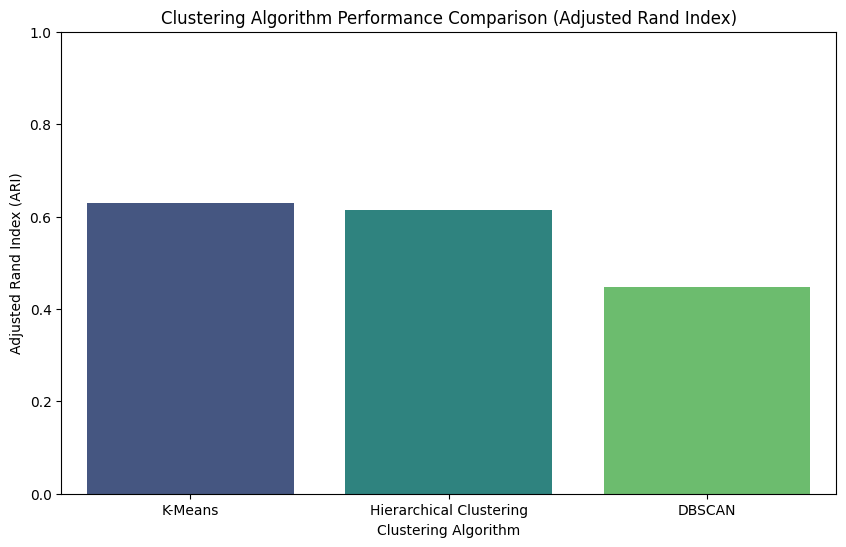

In [ ]:
# A dictionary of algorithm names and their ARI scores
ari_scores = {
    'K-Means': kmeans_adj_rand_score,
    'Hierarchical Clustering': hierarchical_adj_rand_score,
    'DBSCAN': dbscan_adj_rand_score
}

# A pandas Series from the dictionary for easy plotting
ari_series = pd.Series(ari_scores)

# The bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ari_series.index, y=ari_series.values, palette='viridis')
plt.title("Clustering Algorithm Performance Comparison (Adjusted Rand Index)")
plt.xlabel("Clustering Algorithm")
plt.ylabel("Adjusted Rand Index (ARI)")
plt.ylim(0, 1) # ARI ranges from -1 to 1, but for this data, 0 to 1 is sufficient
plt.show()

### Data Analysis Key Findings

*   The K-Means algorithm achieved an Adjusted Rand Index of approximately 0.6201 when compared to the true species labels.
*   The Hierarchical clustering algorithm achieved an Adjusted Rand Index of approximately 0.6153 when compared to the true species labels. The confusion matrix indicated that this clustering did not perfectly align with the true species structure, with some species being split across multiple clusters and some clusters containing instances from different species.
*   The DBSCAN algorithm achieved an Adjusted Rand Index of approximately 0.4421 when compared to the true species labels. The confusion matrix showed that a significant number of data points were identified as noise, and the non-noise clusters showed only moderate correspondence with the true species.
*   Both K-Means and Hierarchical clustering performed similarly and showed better agreement with the true species labels compared to DBSCAN, based on their Adjusted Rand Index scores.


# **To get better result we can try:-**

Review Data Preprocessing: Revisit the scaling step. While StandardScaler is a common choice, consider if other scaling methods (e.g., MinMaxScaler, RobustScaler) might be more appropriate for this dataset.
Re-evaluate Optimal Number of Clusters: Although the elbow method suggested 3 for K-Means and the dendrogram suggested 3 for Hierarchical, these methods are not always definitive. You could explore other methods for determining the optimal number of clusters, such as the Silhouette score.
Tune Algorithm Parameters:
K-Means: Experiment with different n_init values (although 10 is usually sufficient) and different random_state values to see the variability in results.
Hierarchical Clustering: Explore different linkage methods ('complete', 'average', 'single') in addition to 'ward'. Each method calculates the distance between clusters differently and can lead to different clustering structures.
Feature Selection/Engineering: Although the Iris dataset has only four features, in more complex datasets, selecting a subset of features or creating new features might improve clustering. For Iris, you could analyze the pairwise plots to see which features seem to separate the species best and potentially focus on those.
Consider Different Distance Metrics: Both K-Means and Hierarchical Clustering use a distance metric to determine the similarity between data points. By default, Euclidean distance is often used. You could experiment with other distance metrics (e.g., Manhattan, cosine) to see if they yield better results.
Visualize True Species in PCA Space: Create a scatter plot of the PCA-reduced data colored by the true species labels. This will give you a visual benchmark to compare your clustering results against and understand the inherent separability of the species in this reduced dimension.
Evaluate with Multiple Metrics: While ARI is a good metric, consider using others like the Silhouette score, Davies-Bouldin index, or Calinski-Harabasz index to get a more comprehensive view of the clustering quality.
Compare Visualizations: Create visualizations of the clustering results (in the original feature space or PCA-reduced space) for each algorithm and parameter setting you try. Visual inspection can often provide valuable insights that metrics alone might not capture.
Document Findings: Keep track of the parameters you try and the corresponding evaluation metrics and visualizations. This will help you systematically assess which approaches lead to improvements.
Finish task: Summarize the findings and present the best performing approach.
Re-evaluate optimal number of clusters: Calculate and plot the Silhouette scores for a range of cluster numbers for both K-Means and Hierarchical Clustering to find potentially better values for 'k'.
Experiment with hierarchical linkage methods: Apply Hierarchical Clustering using different linkage methods ('complete', 'average', 'single') and evaluate their performance using ARI and potentially other metrics.
Visualize true species in pca space: Create a scatter plot of the PCA-reduced data colored by the true species labels to provide a visual benchmark.
Document and compare results: Summarize the evaluation results from the different approaches (different 'k' for K-Means/Hierarchical, different linkage methods) and compare them to the initial results.


To connect your Colab notebook to GitHub, you can save a copy of your notebook to GitHub directly from Colab.

1.  **Save a copy to GitHub:** Go to `File` > `Save a copy to GitHub`.
2.  **Choose your repository:** A dialog will appear where you can select the GitHub repository you want to save the notebook to. You may need to authorize Colab to access your GitHub account if you haven't already.
3.  **Specify the file path:** You can specify the folder and filename within your repository.
4.  **Include a commit message:** Add a commit message to describe the changes you are saving.
5.  **Click OK:** Colab will then save a copy of your notebook to the specified location in your GitHub repository.

Alternatively, you can link your notebook to a GitHub repository:

1.  **Open a notebook from GitHub:** Go to `File` > `Open notebook`.
2.  **Select the GitHub tab:** In the dialog box, select the `GitHub` tab.
3.  **Enter the GitHub repository URL or search:** You can either paste the URL of the GitHub repository or search for it.
4.  **Select the notebook:** Choose the notebook file you want to open from the repository.

Once you have opened a notebook from GitHub, you can save changes back to the repository by going to `File` > `Save a copy to GitHub`.